We will discuss image segmentation. One of the most fundamental and studied topics in image processing.


The goal is to partition images into regions, or segments, to simplify and/or change the representation into something more meaningful and easier to analyze.

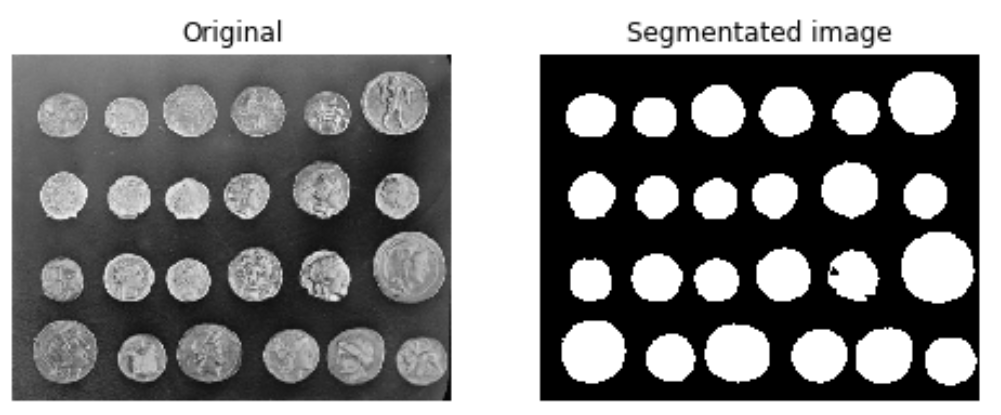

For example, before a tumor is analyzed in a computed tomography, it has to be detected and somehow isolated from the rest of the image. Or before recognizing a face, it has to also be picked out from its background. Previously we learned about Thresholding, which is the simplest method of segmentation. Separating foreground from background. Now we'll learn about separating more than that.

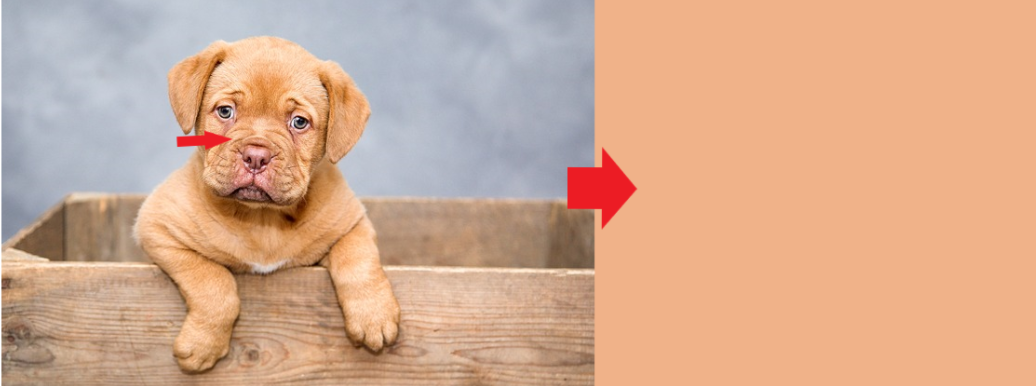

Consider how we represent images. They are represented as a grid of pixels. The issue is that they're not a completely natural representation of an image. If I were to take a single pixel from the image on the left and then showed it to you on the right, would you be able to tell that the pixel came from a puppy and that this single pixel holds a logical meaning? A single pixel, standing alone by itself, is not a natural representation.

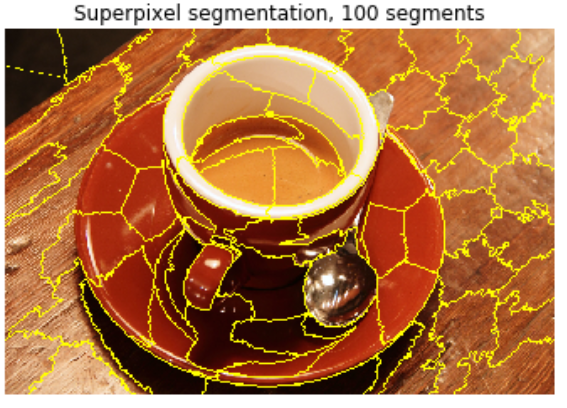

So, we can explore more logical meanings in an image that's formed by bigger regions or grouped pixels. These are known as superpixels. A superpixel is a group of connected pixels with similar colors or gray levels. These carry more meaning than their simple pixel grid counterparts.


Superpixel segmentation is dividing an image into superpixels. It has been applied to many computer vision tasks, like visual tracking and image classification. Some advantages for using them are that You can compute features on more meaningful regions. And that you can reduce an image from thousands of pixels down to some regions for subsequent algorithms, so you have computational efficiency.

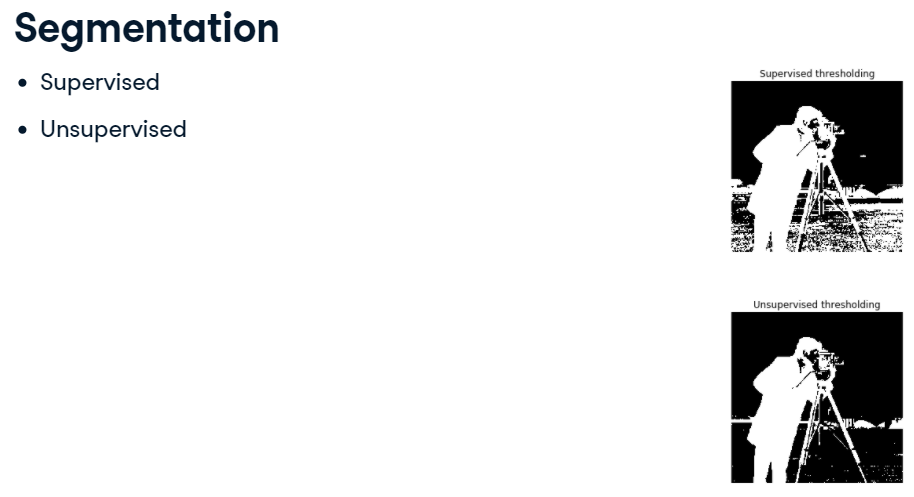

Two types of segmentation are, Supervised, where some prior knowledge is used to guide the algorithm. Like the kind of thresholding in which we specify the threshold value ourselves. And unsupervised where no prior knowledge is required. These algorithms try to subdivide images into meaningful regions automatically. The user may still be able to tweak certain settings to obtain the desired output. Like the otsu thresholding we used in first chapter.

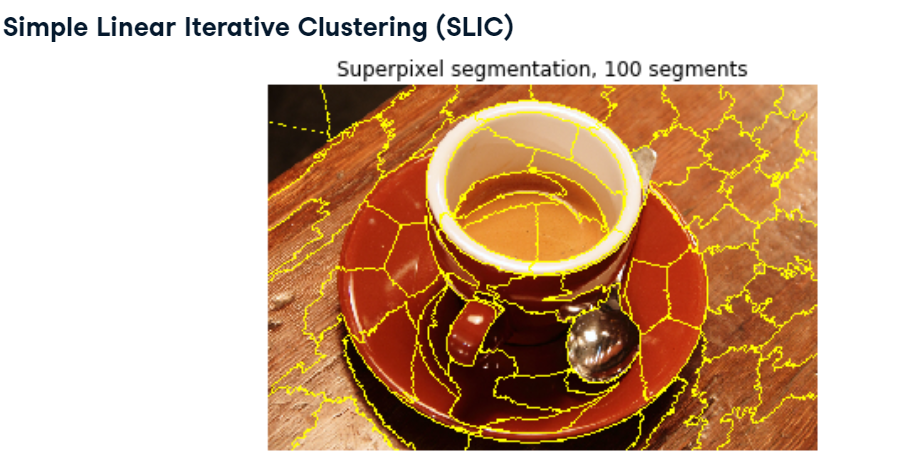

Lets focus on a unsupervised segmentation technique based on superpixels, called Simple Linear Iterative Clustering or SLIC. It segments the image using a machine learning algorithm called K-Means clustering. It takes in all the pixel values of the image and tries to separate them into a predefined number of sub-regions.

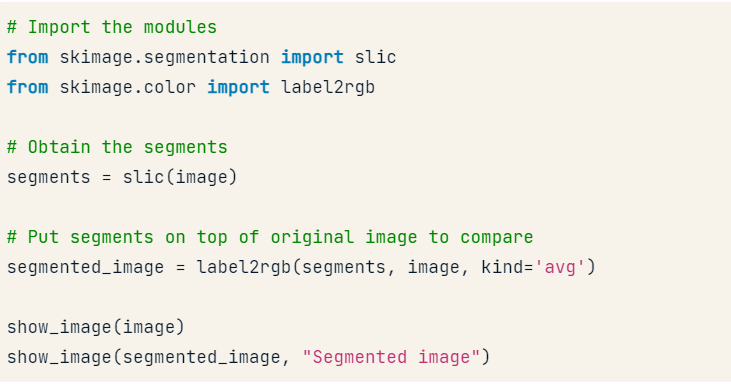

We can find the algorithm in the segmentation module as the "slic" function. This method returns the segmented regions, also known as labels. Here we use this function, with default parameters and obtain the segments. We'll use the label2rgb method from the color module to return an image where the segments obtained from the slic method will be highlighted, either with random colors or with the average color of the superpixel segment. In this example we'll use the average color. So we pass the segments or labels, the image, and set the kind parameter to average avg. Finally, we show the resulting segmented image.

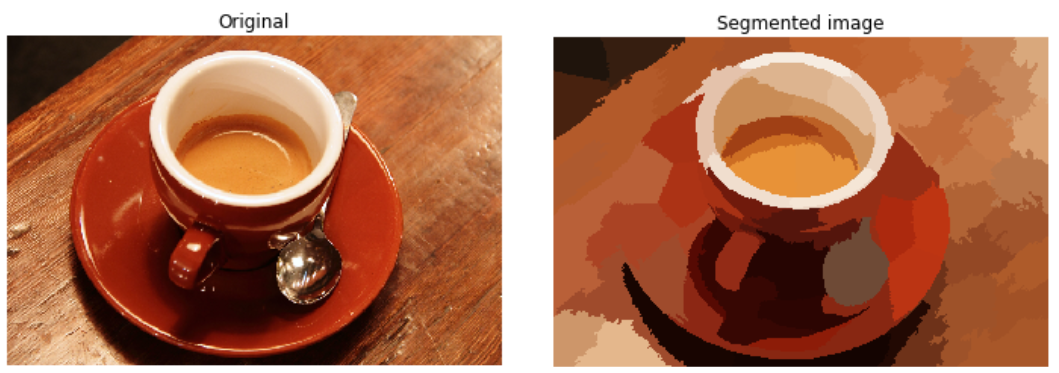

You can see how local regions with similar color and texture distributions are part of the same superpixel group.

If we want more segments, let's say 300, we can specify this with an optional parameter, n_segments. Its default value is 100 segments.

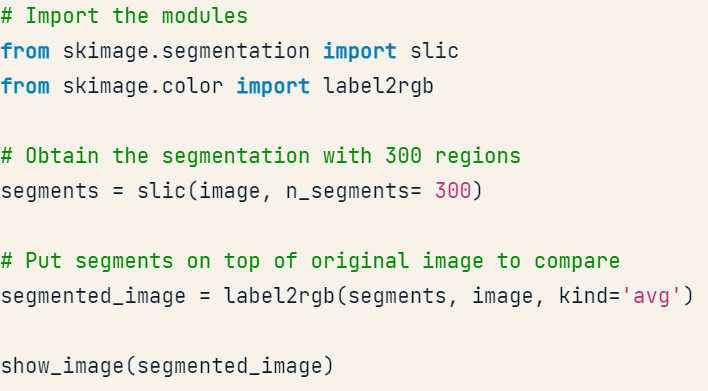


So now the image is segmented in more regions, 300.

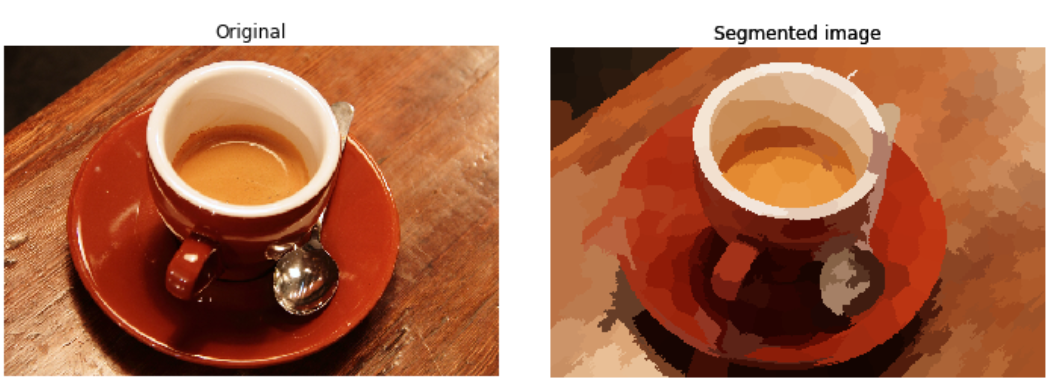

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

### Number of pixels
Let's calculate the total number of pixels in this image.

![rs](./images/chinese.jpg)

The total amount of pixel is its resolution. Given by **Height X Width**

Use .shape from NumPy which is preloaded as np, in the console to check the width and height of the image.

In [4]:
face_image = plt.imread('./images/chinese.jpg')

In [5]:
face_image.shape

(265, 191, 3)

In [6]:
Pixel = 265* 191

In [7]:
print(Pixel)

50615


### Superpixel segmentation
In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from 265×191=50,615 pixels down to 400 regions.

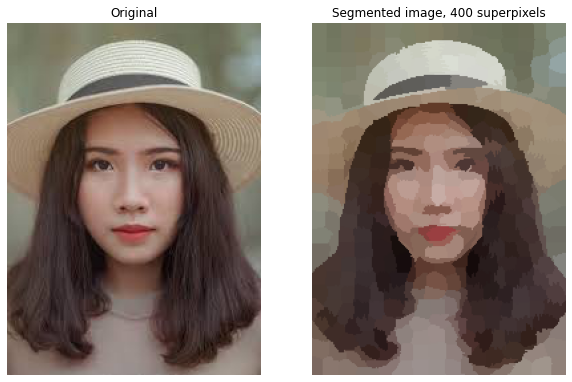

In [8]:
from skimage.segmentation import slic
from skimage.color import label2rgb


# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

We reduced the image from 50,615 pixels to 400 regions! Much more computationally efficient for, for example, face detection machine learning models.



Let's dive into finding contours.

We will learn how to find the contours of the objects in an image. A contour is a closed shape of points or line segments, representing the boundaries of these objects. 

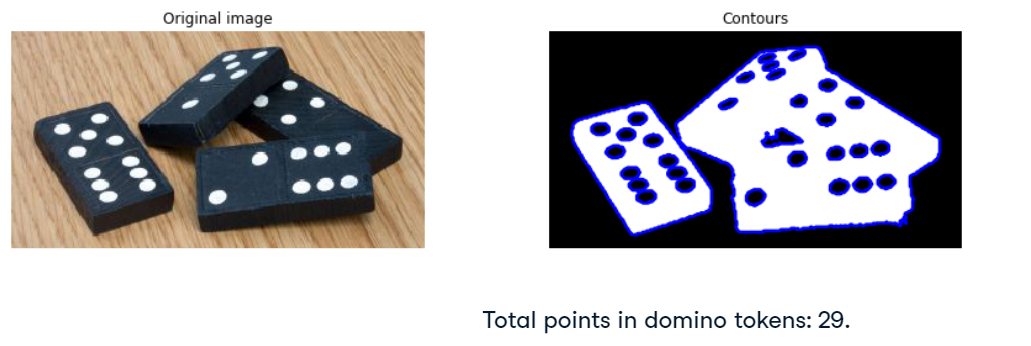

Once we find the contours, we can do things like identifying the total points in domino tokens, exactly what we do in this example, where we count 35! So we can measure size, classify shapes or determining the number of objects in an image.

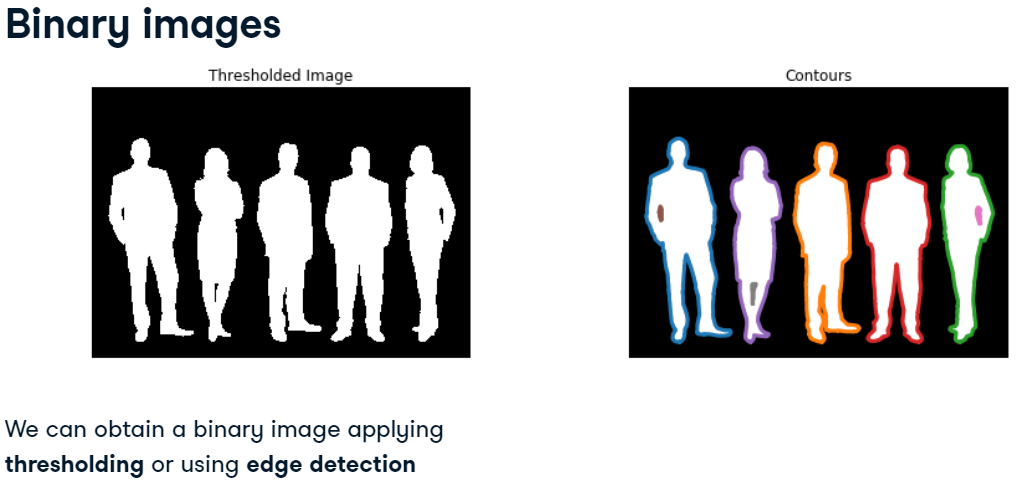

The input to a contour-finding function should be a binary image, which we can produce by first applying thresholding. 

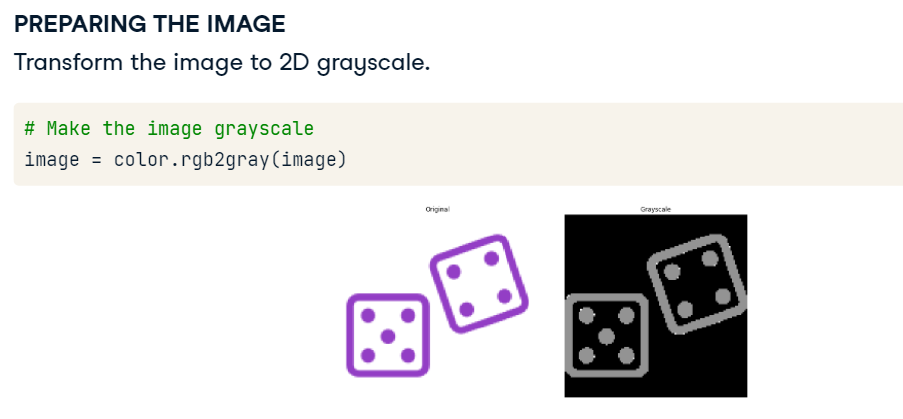


In such binary image, the objects we wish to detect should be white, while the background remains black.

First, the image needs to go through some pre-processing steps. 

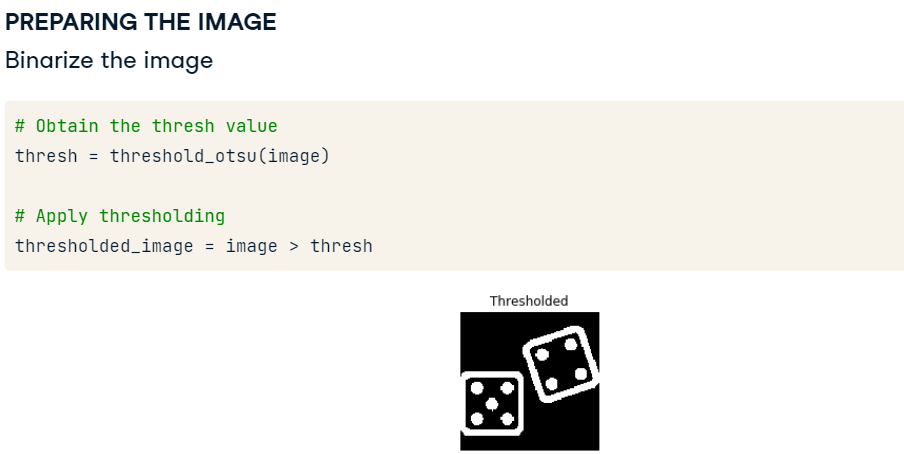

We need to turn the image to grayscale to later apply thresholding. We can do so by using the rgb2gray function from the color module.

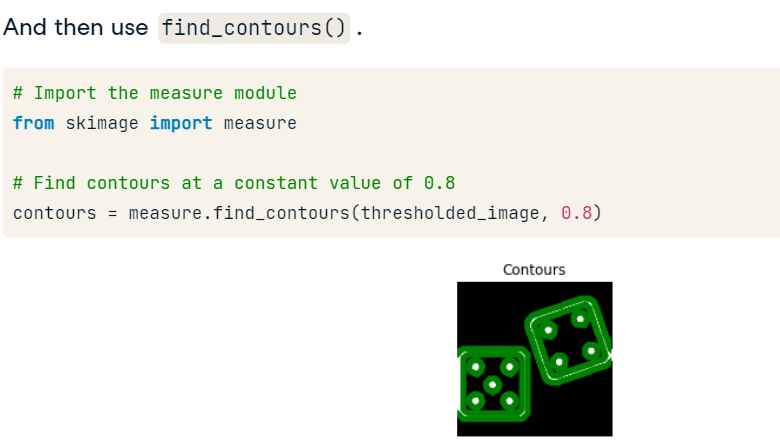

To use the find_contours function, we need the image we want to obtain contours from, to be binary. Meaning, black and white. Here we apply thresholding to do that, so we get a thresholded image.


And then, we use the find contours function, that is included in the measure module of scikit-image. This function finds the contour lines or joins points(pixels) of equal elevation or brightness in a 2D array above a given level value. We import the module "measure" from skimage. And from measure we call the function find_contours. Passing the thresholded image as the first parameter and a constant level value of zero point eight. We will go into more detail about the constant level value in the next slide. The function returns a list with all contours of the image. With the coordinates along the contour.

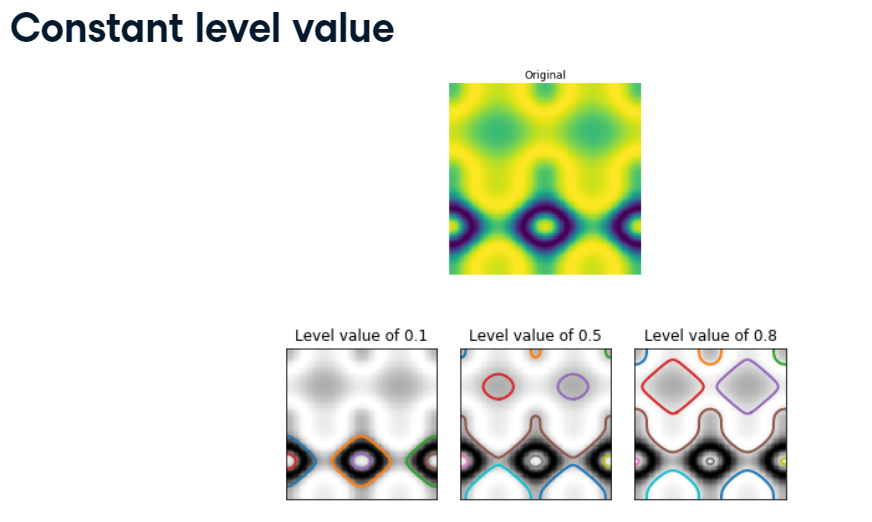

The level value varies between 0 and 1, the closer to 1 the more sensitive the method is to detecting contours, so more complex contours will be detected. We have to find the value that best detects the contours we care for.

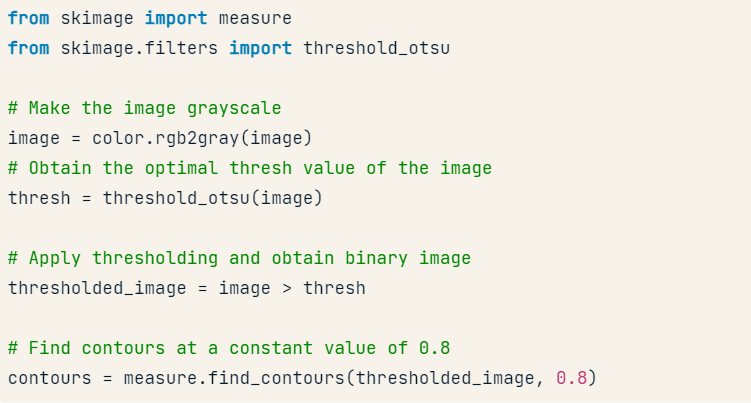

To summarize, the steps for finding the contours of an image are: If it's colored, transform to grayscale. Obtain the optimal thresh value. Apply thresholding and obtain the binary image. Once we have our binary image, we can call the find_contours() function and set a constant level value.

Resulting in the image with contours detected.

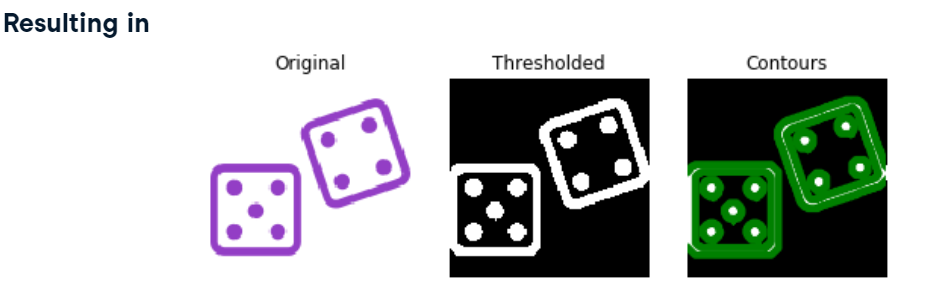

After executing these steps we obtain a list of contours. Each contour is an ndarray of shape (n, 2), consisting of n row and column coordinates along the contour. In this way, a contour is like an outline formed by multiple points joined together. The bigger the contour, the more points joined together and the wider the perimeter formed. Here we can see the shapes of the contours found in the domino's tokens image.

The first two have a shape of 433, so we deduct they are the outer border contour of the tokens because they are the longest. Meaning, these are the biggest objects, judging by their shapes.

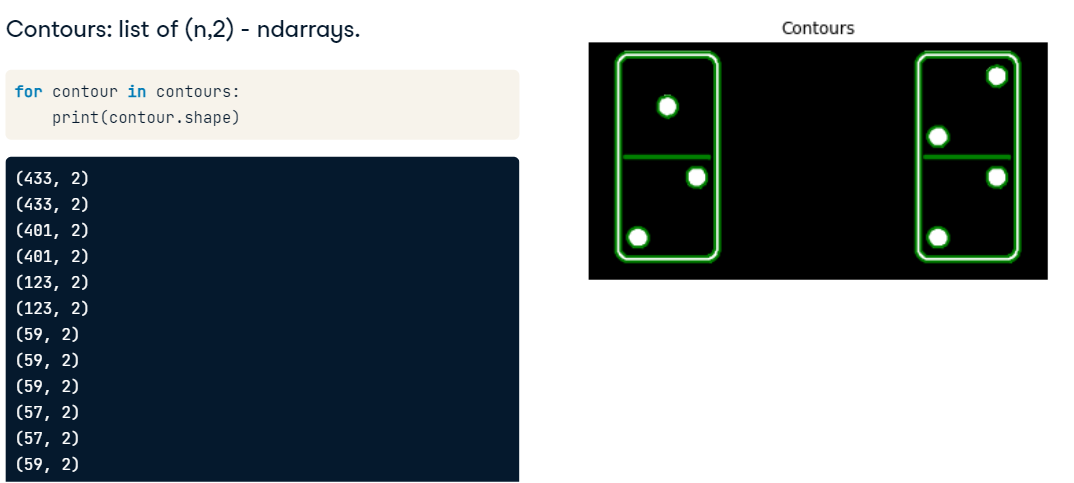

The ones that have a shape of 401 belong to the inner border of the domino token. Since the tokens of the original image had a line around them.

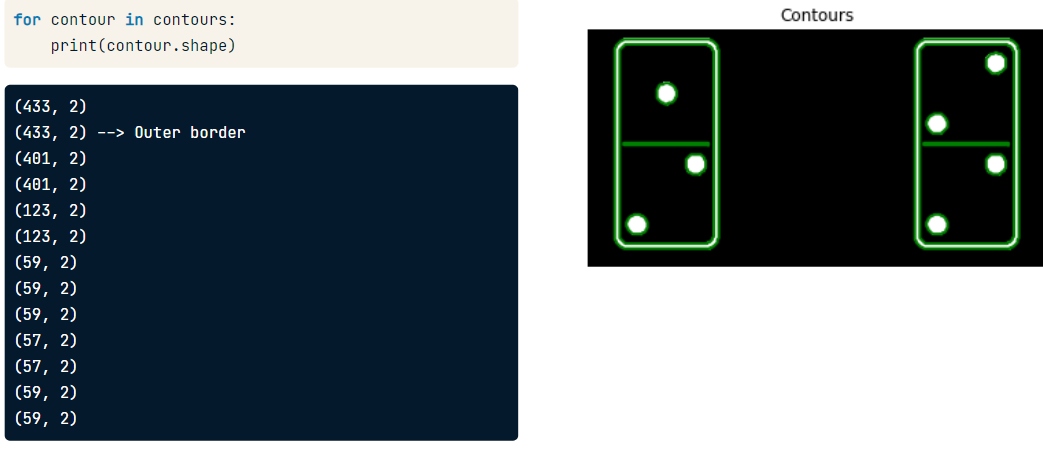

The 123 are the dividing line in the middle of the tokens.

And then we see the majority of the contours have a shape of 59. These are the token dots. If we count them, we obtain a total number of 7, the total number of dots for both tokens.


Contouring shapes
In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

![imdd](./images/horse.png)



In [9]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

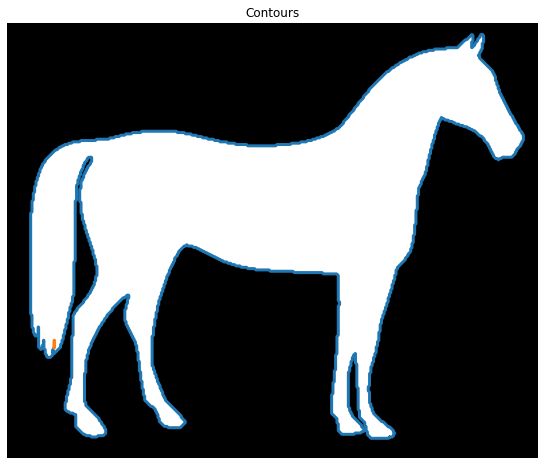

In [10]:
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

### Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dices loaded as image_dices and determine what number was rolled for each dice.

![dice](images/dices.png)

In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

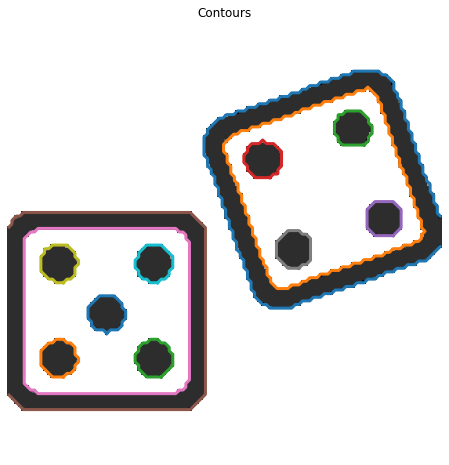

In [12]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import color

image_dices = imread('./images/dices.png')

# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, level=0.8)

# Show the image
show_image_contour(image_dices, contours)

### Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

![step](images/steps_contours.png)

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

Dice`s dots number: 9.


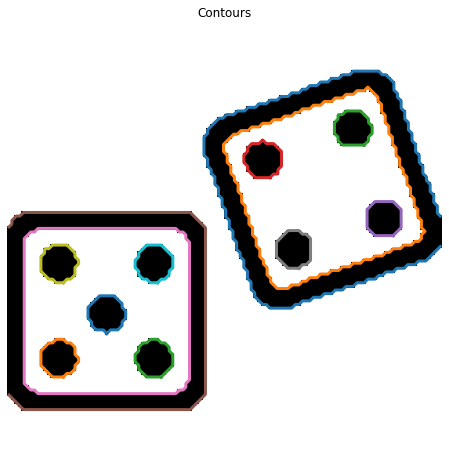

In [13]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print('Dice`s dots number: {}.'.format(len(dots_contours)))